In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_table('2018-E-c-En-train.txt')

In [3]:
print(data.head())

              ID                                              Tweet  anger  \
0  2017-En-21441  “Worry is a down payment on a problem you may ...      0   
1  2017-En-31535  Whatever you decide to do make sure it makes y...      0   
2  2017-En-21068  @Max_Kellerman  it also helps that the majorit...      1   
3  2017-En-31436  Accept the challenges so that you can literall...      0   
4  2017-En-22195  My roommate: it's okay that we can't spell bec...      1   

   anticipation  disgust  fear  joy  love  optimism  pessimism  sadness  \
0             1        0     0    0     0         1          0        0   
1             0        0     0    1     1         1          0        0   
2             0        1     0    1     0         1          0        0   
3             0        0     0    1     0         1          0        0   
4             0        1     0    0     0         0          0        0   

   surprise  trust  
0         0      1  
1         0      0  
2         0      

In [20]:
categories = list(data.columns.values)

In [21]:
print(categories)

['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']


In [22]:
data.iloc[:,2:].sum().values

array([2544,  978, 2602, 1242, 2477,  700, 1984,  795, 2008,  361,  357])

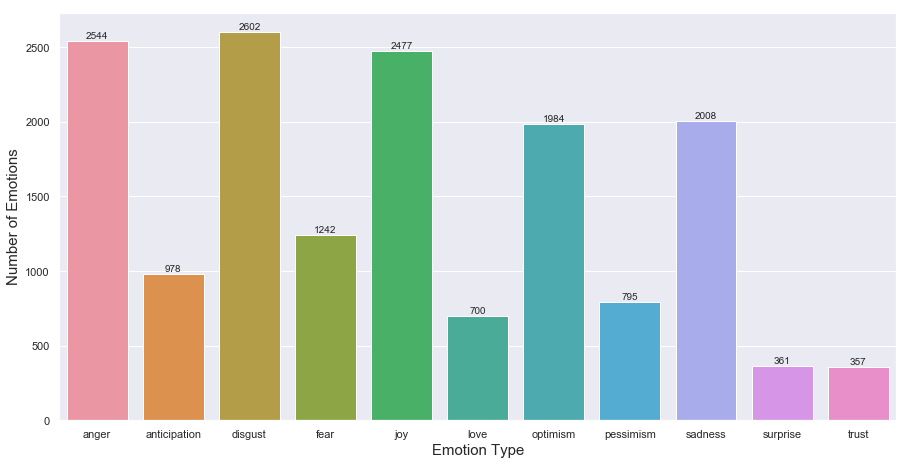

In [24]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,7.5))
plt.ylabel("Number of Emotions", fontsize = 15)
plt.xlabel("Emotion Type", fontsize = 15)
ax = sns.barplot(categories[2:], data.iloc[:,2:].sum().values)
rects = ax.patches
labels = data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5, label,
           ha = 'center', va = 'bottom', fontsize =10)
plt.show()


In [31]:
rowsums = data.iloc[:,2:].sum(axis =1)

In [32]:
print(rowsums.head())

0    3
1    3
2    4
3    2
4    2
dtype: int64


In [33]:
multilabel_counts = rowsums.value_counts(ascending = True)

In [34]:
multilabel_counts.index

Int64Index([6, 5, 0, 4, 1, 3, 2], dtype='int64')

In [35]:
multilabel_counts.values

array([  11,   96,  204,  658,  982, 2114, 2773])

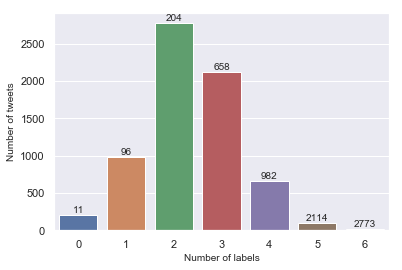

In [37]:
ax = sns.barplot(multilabel_counts.index, multilabel_counts.values)
plt.ylabel('Number of tweets', fontsize = 10)
plt.xlabel('Number of labels', fontsize = 10) 
rects = ax.patches
labels = multilabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5, label,
           ha = 'center', va = 'bottom', fontsize =10)
plt.show()

In [38]:
tweets = data.Tweet

In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
text = tweets.values

In [41]:
cloud = WordCloud(stopwords = STOPWORDS,
                 background_color = 'black',
                 collocations = False,
                 width = 2500,
                 height = 1800).generate(" ".join(text))

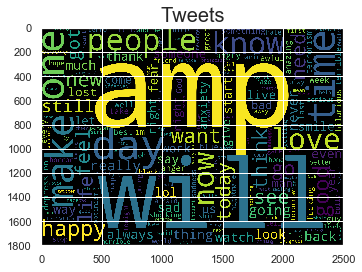

In [42]:
plt.title("Tweets",fontsize = 20)
plt.imshow(cloud)

In [46]:
data.columns

Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')

In [47]:
data.shape

(6838, 13)

In [48]:
# drop any rows that have "na"
df1 = data.dropna(how="any")

In [49]:
df1.shape # there is no na data 

(6838, 13)

### One vs Rest methodology 

In [50]:
train_data = pd.read_table('2018-E-c-En-train.txt')

In [51]:
dev_data = pd.read_table('2018-E-c-En-dev.txt')

In [52]:
train_text = train_data.Tweet

In [53]:
dev_text = dev_data.Tweet

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents = "unicode", analyzer = "word", ngram_range = (1,3), norm = "l2")
vectorizer.fit(train_text)
vectorizer.fit(dev_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [56]:
x_train = vectorizer.transform(train_text)
y_train = train_data.drop(labels = ["ID", "Tweet"], axis = 1)

x_dev = vectorizer.transform(dev_text)
y_dev = dev_data.drop(labels = ["ID", "Tweet"], axis = 1)

In [57]:
vocab = vectorizer.vocabulary_# {feature name: feature index}

In [58]:
vocab = {i:v for v,i in vocab.items()}

Logistic Regression baseline

In [60]:
LogReg_pipeline = Pipeline([
    ('clf', OneVsRestClassifier(LogisticRegression(solver = 'sag'), n_jobs = -1)),])
categories = categories[2:]
for category in categories:
    LogReg_pipeline.fit(x_train, y_train[category])
    print("Processing {} tweets ".format(category))
    prediction = LogReg_pipeline.predict(x_train)
    print("Accuracy on training set is {}".format(accuracy_score(y_train[category], prediction)))
    prediction_dev = LogReg_pipeline.predict(x_dev)
    print("Accuracy on dev set is {}".format(accuracy_score(y_dev[category], prediction_dev)))

Processing anger tweets 
Accuracy on training set is 0.8536121673003803
Accuracy on dev set is 0.6828442437923251
Processing anticipation tweets 
Accuracy on training set is 0.8603392804913718
Accuracy on dev set is 0.8600451467268623
Processing disgust tweets 
Accuracy on training set is 0.8335770693185142
Accuracy on dev set is 0.6839729119638827
Processing fear tweets 
Accuracy on training set is 0.8964609534951741
Accuracy on dev set is 0.8702031602708804
Processing joy tweets 
Accuracy on training set is 0.8524422345715121
Accuracy on dev set is 0.6715575620767494
Processing love tweets 
Accuracy on training set is 0.9143024276104124
Accuracy on dev set is 0.8510158013544018
Processing optimism tweets 
Accuracy on training set is 0.8262649897630886
Accuracy on dev set is 0.6738148984198645
Processing pessimism tweets 
Accuracy on training set is 0.8868090084820123
Accuracy on dev set is 0.8871331828442438
Processing sadness tweets 
Accuracy on training set is 0.8144194208832992
Ac

In [61]:
# random_forest pipeline
RF_pipeline = Pipeline([('rf', OneVsRestClassifier(RandomForestClassifier(n_estimators = 300,
                                                                        max_depth = 5,
                                                                       random_state = 0))),])


In [62]:
for category in categories:
    RF_pipeline.fit(x_train, y_train[category])
    print("Processing {} tweets ".format(category))
    prediction = RF_pipeline.predict(x_train)
    print("Accuracy on training set is {}".format(accuracy_score(y_train[category], prediction)))
    prediction_dev = RF_pipeline.predict(x_dev)
    print("Accuracy on dev set is {}".format(accuracy_score(y_dev[category], prediction_dev)))

Processing anger tweets 
Accuracy on training set is 0.6279613922199474
Accuracy on dev set is 0.6444695259593679
Processing anticipation tweets 
Accuracy on training set is 0.856975723895876
Accuracy on dev set is 0.8600451467268623
Processing disgust tweets 
Accuracy on training set is 0.6194793799356537
Accuracy on dev set is 0.6399548532731377
Processing fear tweets 
Accuracy on training set is 0.818367943843229
Accuracy on dev set is 0.863431151241535
Processing joy tweets 
Accuracy on training set is 0.6377595788242176
Accuracy on dev set is 0.5485327313769752
Processing love tweets 
Accuracy on training set is 0.8976308862240421
Accuracy on dev set is 0.8510158013544018
Processing optimism tweets 
Accuracy on training set is 0.7098566832407136
Accuracy on dev set is 0.6534988713318285
Processing pessimism tweets 
Accuracy on training set is 0.8837379350687335
Accuracy on dev set is 0.8871331828442438
Processing sadness tweets 
Accuracy on training set is 0.7063468850541094
Accur

In [ ]:
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  

In [ ]:
dot_data = StringIO()

In [ ]:
# inspect anger vs rest

category = "anger"
RF_pipeline.fit(x_train, y_train[category])

In [ ]:
forest = RF_pipeline.named_steps['rf'].estimators_[0].estimators_ #300 trees(parameter)

In [327]:
# pull no.5 tree from forest
pull_a_tree = forest[5]

In [319]:
# get feature importance
importances = pull_a_tree.feature_importances_
sorted_importances = sorted(range(len(importances)), key = lambda k:importances[k], reverse = True)


In [326]:
# only fetch first 100 features
important_features = sorted_importances[0:50]
for i in important_features:
        
    print("{}:{}".format(vocab[i],importances[i]))

amazing:0.4638078656521744
these:0.15256204403824314
and he:0.11660474818441488
stupidity:0.10292227079955134
full:0.08752766558524291
have to:0.03660842179538728
the moment:0.02043714748135893
adrenaline:0.011677955339747192
are going to:0.007105388192443653
for it:0.0007464929314362382
00:0.0
00 adorablewife:0.0
00 adorablewife adorablewedding:0.0
00 running:0.0
00 running off:0.0
000:0.0
000 developments:0.0
000 developments from:0.0
000 followers:0.0
000 followers whisky:0.0
00966504634031:0.0
00966504634031 thx:0.0
00am:0.0
00am goodmorning:0.0
00am goodmorning twitter:0.0
00s:0.0
00s ll:0.0
00s ll have:0.0
01am:0.0
01am and:0.0
01am and it:0.0
01mattwhite:0.0
01mattwhite football__tweet:0.0
01mattwhite football__tweet deadlinedaylive:0.0
03:0.0
03 from:0.0
03 from victoria:0.0
05:0.0
05 30:0.0
05 30 cartick:0.0
0530:0.0
07:0.0
07 11:0.0
07 11 17:0.0
071117:0.0
071304nathan:0.0
071304nathan happy:0.0
071304nathan happy blissful:0.0
09:0.0
09 00am:0.0


In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

export_graphviz(pull_a_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)


In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())